In [268]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss


In [269]:
column_names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis ', 'Abnormal/Normal'] 

df = pd.read_csv("data/column_3C.dat",sep=" ", header=None)
df.columns = column_names
df.head(2)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Abnormal/Normal
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH


In [270]:
df.shape

(310, 7)

In [271]:
df.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
Abnormal/Normal               object
dtype: object

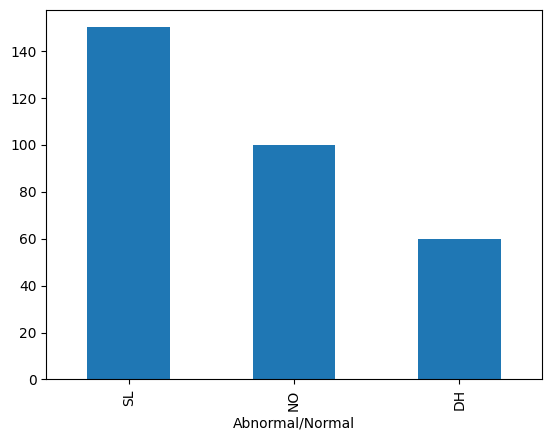

In [272]:
df['Abnormal/Normal'].value_counts().plot.bar()
plt.show()

In [273]:
df.isnull().sum()

pelvic_incidence             0
pelvic_tilt                  0
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius                0
degree_spondylolisthesis     0
Abnormal/Normal              0
dtype: int64

In [274]:
df['Abnormal/Normal'] = df['Abnormal/Normal'].map({'SL': 1, 'NO': 2, 'DH': 3})

In [275]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis ',
       'Abnormal/Normal'],
      dtype='object')

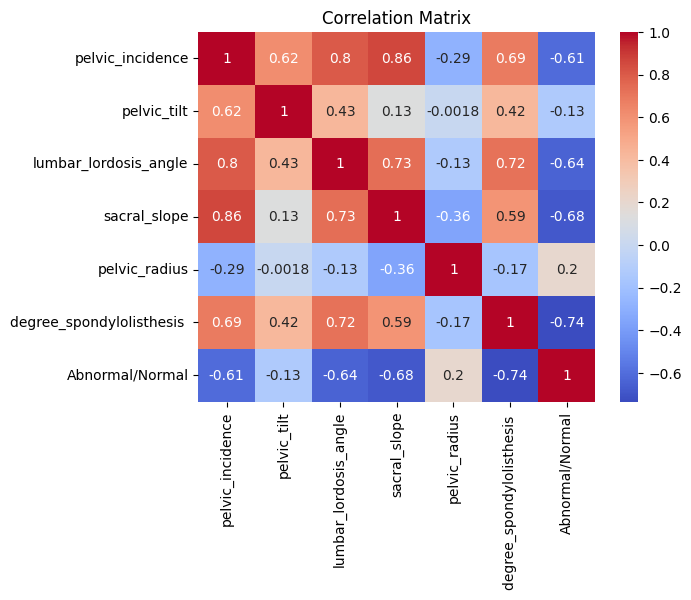

In [298]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

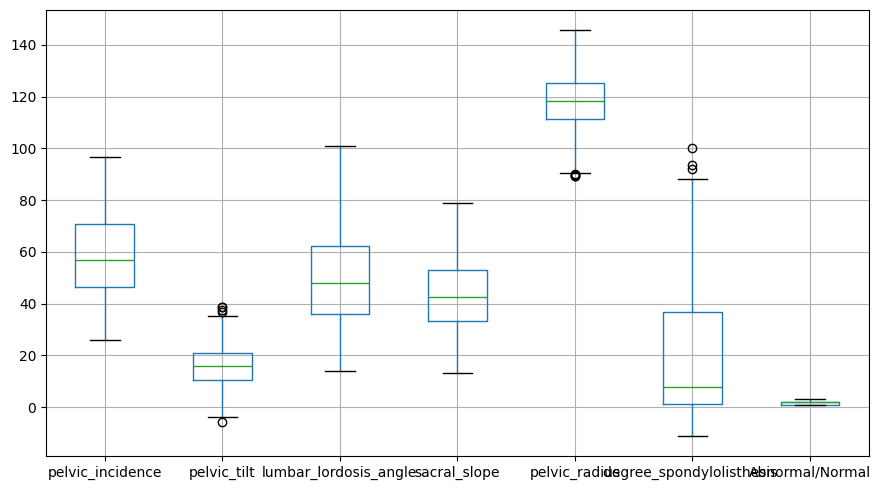

In [299]:
plt.figure(figsize=(9,5))
df.boxplot()
plt.tight_layout()
plt.show()

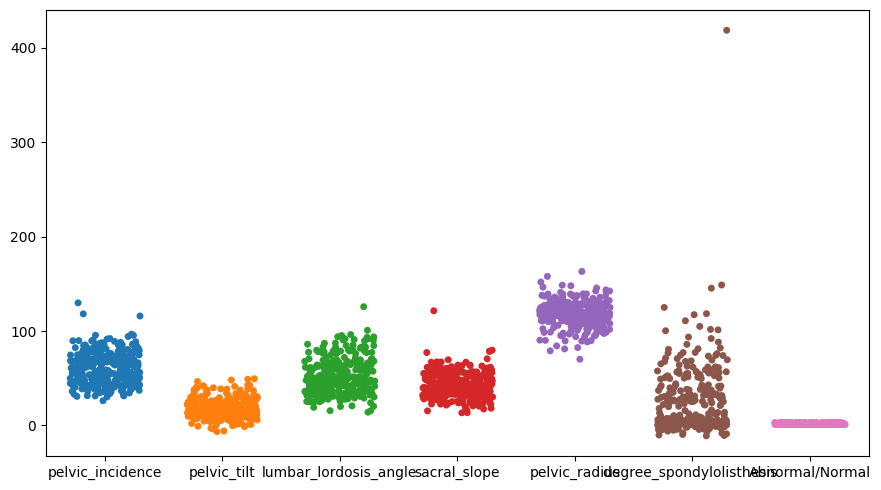

In [277]:

plt.figure(figsize=(9,5))
sns.stripplot(data=df, jitter=0.3)
plt.tight_layout()
plt.show()

In [278]:
featuresCols = df.select_dtypes(include=['float64']) 

Q1 = featuresCols.astype(float).quantile(.25)
Q3 = featuresCols.astype(float).quantile(.75)

IQR = Q3 - Q1

upper =  Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

In [279]:
upper

pelvic_incidence             112.55125
pelvic_tilt                   39.29875
lumbar_lordosis_angle        102.00000
sacral_slope                  81.71000
pelvic_radius                147.60375
degree_spondylolisthesis     100.81250
dtype: float64

In [280]:
for col in featuresCols.columns:
    df = df[~((df[col] <= lower[col]) | (df[col] >= upper[col]))]

In [281]:
df.shape

(279, 7)

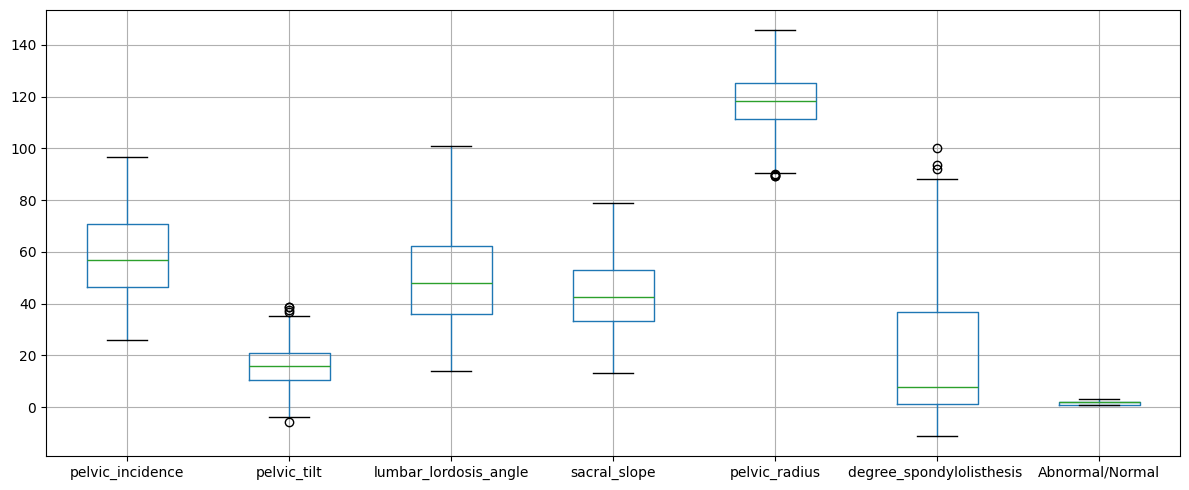

In [301]:
plt.figure(figsize=(12,5))
df.boxplot()
plt.tight_layout()
plt.show()

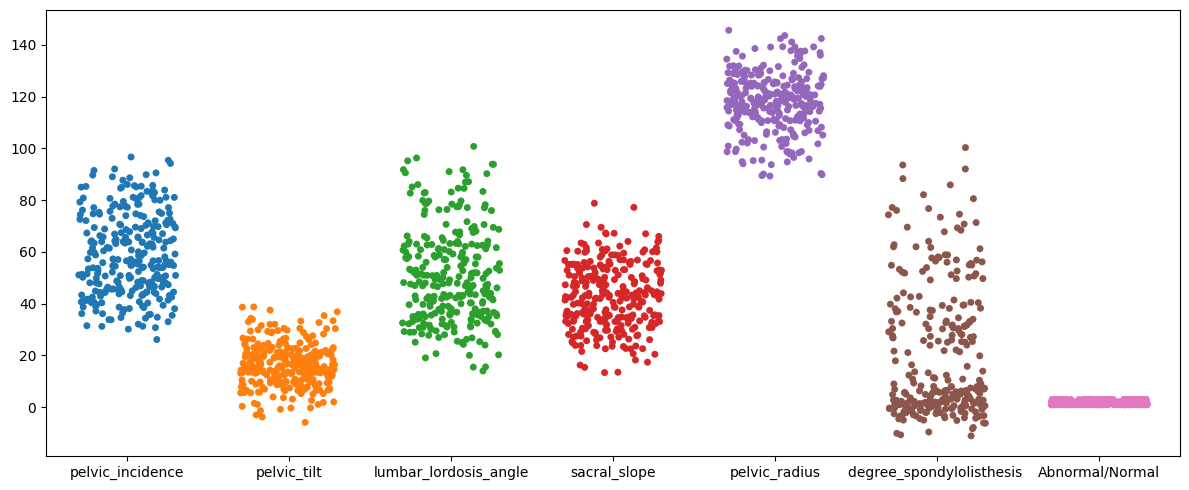

In [283]:
plt.figure(figsize=(12,5))
sns.stripplot(data=df, jitter=0.3)
plt.tight_layout()
plt.show()

In [284]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [286]:
pipeline = Pipeline(
    steps=[
        ('scale', StandardScaler()),
        ('model', LogisticRegression())
    ]
)

In [287]:
pipeline.fit(X_train, y_train)

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [294]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [295]:
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.8699551569506726
              precision    recall  f1-score   support

           1       0.98      0.96      0.97        98
           2       0.79      0.87      0.83        79
           3       0.78      0.67      0.72        46

    accuracy                           0.87       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.87      0.87      0.87       223

0.8392857142857143
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.83      0.75      0.79        20
           3       0.60      0.75      0.67        12

    accuracy                           0.84        56
   macro avg       0.81      0.82      0.81        56
weighted avg       0.85      0.84      0.84        56



In [297]:
logloss_train = log_loss(y_train, pipeline.predict_proba(X_train))
logloss_test = log_loss(y_test, pipeline.predict_proba(X_test))

logloss_train, logloss_test

(0.30682222207849685, 0.4192859714701446)